In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5], 
              [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

In [3]:
#number of nearest neighbor to select
k = 5

In [4]:
#test datapoint
test_datapoint = [4.3, 2.7]

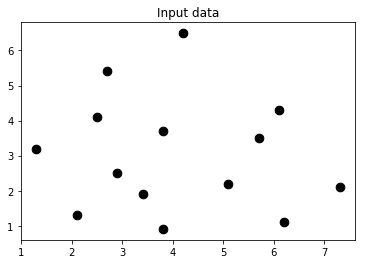

In [5]:
#data visualization
plt.figure()
plt.title("Input data") 
plt.scatter(X[:, 0], X[:, 1], marker="o", s=75, color="black")
plt.show()

In [6]:
#k-nn model
knn_model = NearestNeighbors(n_neighbors=k, algorithm="ball_tree").fit(X)
distances, indices = knn_model.kneighbors(test_datapoint)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## * ball tree algorithm :  ball tree, balltree or metric tree is a space partitioning data structure for organizing points in a multi-dimensional space. 
## -> 다차원 공간에서 점들이 분포하도록 공간을 나누는 알고리즘
A ball tree is a binary tree in which every node defines a D-dimensional hypersphere, or ball, containing a subset of the points to be searched. Each internal node of the tree partitions the data points into two disjoint sets which are associated with different balls. While the balls themselves may intersect, each point is assigned to one or the other ball in the partition according to its distance from the ball's center. Each leaf node in the tree defines a ball and enumerates all data points inside that ball.
Each node in the tree defines the smallest ball that contains all data points in its subtree. This gives rise to the useful property that, for a given test point t, the distance to any point in a ball B in the tree is greater than or equal to the distance from t to the ball.

- ball tree는 각 노드가 D차원 초구(3차원보다 큰 형태의 구, ball)를 정의하는 2진 트리이며, 이 구는 점들의 부분집합을 포함하고 있다.
- 트리의 각 노드는 점들을 2개의 서로소 집합으로 나누고 이 집합들을 각각 2개의 ball에 연결된다. ball들끼리는 교집합이 있을 수 있지만, 점은 2개의 ball 중 하나에 속하게 된다. 
- 트리의 각 노드는 그 서브트리 안에 모든 데이터 포인트들을 담는 가장 작은 ball을 정의한다. 임의로 주어진 점 t의 ball 내의 임의의 점에 대한 거리는 ball에 대한 거리보다 크거나 가깝다.
- 최종적으로 leaf node는 각각의 ball을 의미하며, 모든 데이터 포인트들을 담고 있다.

D^{B}(t) = \begin{cases}\max(|t-B.pivot|-B.radius,D^{B.parent}),&{\text{if }}B\neq Root\\\max(|t-B.pivot|-B.radius,0),&{\text{if }}B=Root\\\end{cases}

- ref : https://en.wikipedia.org/wiki/Ball_tree

In [7]:
knn_model

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [8]:
print(distances) #상위 k개의 점들과의 거리
print(indices) #상위 k개의 점들의 인덱스

[[ 0.94339811  1.11803399  1.20415946  1.41421356  1.61245155]]
[[12  7  9  2 10]]


In [9]:
#K개의 최근접 이웃 출력
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1) : 
    print(str(rank) + "==>", X[index], "\tdistance with test_datapoint:", distances[0][rank-1])


K Nearest Neighbors:
1==> [ 5.1  2.2] 	distance with test_datapoint: 0.943398113206
2==> [ 3.8  3.7] 	distance with test_datapoint: 1.11803398875
3==> [ 3.4  1.9] 	distance with test_datapoint: 1.20415945788
4==> [ 2.9  2.5] 	distance with test_datapoint: 1.41421356237
5==> [ 5.7  3.5] 	distance with test_datapoint: 1.61245154966


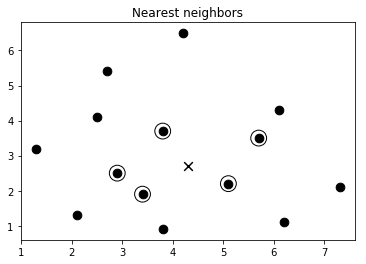

In [10]:
#data visualization
plt.figure()
plt.title("Nearest neighbors")
plt.scatter(X[:, 0], X[:, 1], marker="o", s=75, color="k")
plt.scatter(X[indices][0][:,0], X[indices][0][:,1], marker="o", s=250, color="k", facecolors="none")
plt.scatter(test_datapoint[0], test_datapoint[1], marker="x", s=75, color="k")
plt.show()